In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading WD layercounts
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
new_wdc_count['age'] = new_wdc_count['age'] * 1000
old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)
old_wdc_count['age'] = old_wdc_count['Cal age [ka BP] (ice age)']*1000

#loading EDML layercounts
EDML_reset_depth = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_LayerCount_Revised.txt', sep='\t', comment='#')
edml_gicc05 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=0, skiprows=1, usecols=[0,1])
edml_gicc05['yr b1950'] = edml_gicc05['Year b2k'] - 50
edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

#load GICC21 layercount
gicc21 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC21.xlsx', sheet_name=1, skiprows=1, usecols=[0,6,8], names=['age', 'ngrip m', 'grip m'])
gicc21['age'] = gicc21['age'] - 50

#tiepoints
ngrip_edml_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,2], names=['EDML m', 'NGRIP m'])
grip_wdc_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Modified_WDC_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,1], names=['WDC m', 'GRIP m'])

#interpolations
ngrip_edml_ties['new_edml age'] = np.interp(ngrip_edml_ties['EDML m'], EDML_reset_depth['Depth (m)'], EDML_reset_depth['age (b1950)'])
ngrip_edml_ties['old_edml age'] = np.interp(ngrip_edml_ties['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950'])
ngrip_edml_ties['gicc21 age'] = np.interp(ngrip_edml_ties['NGRIP m'], gicc21['ngrip m'], gicc21['age'])

grip_wdc_ties['new_wdc age'] = np.interp(grip_wdc_ties['WDC m'], new_wdc_count['depth'], new_wdc_count['age'])
grip_wdc_ties['old_wdc age'] = np.interp(grip_wdc_ties['WDC m'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])
grip_wdc_ties['gicc21 age'] = np.interp(grip_wdc_ties['GRIP m'], gicc21['grip m'], gicc21['age'])


In [3]:
ngrip_edml_ties['diff'] = ngrip_edml_ties['gicc21 age'] - ngrip_edml_ties['new_edml age']
ngrip_edml_ties

,EDML m,NGRIP m,new_edml age,old_edml age,gicc21 age,diff
0,117.71,265.32,1267.090909,1270.090909,1267.216667,0.125758
1,125.25,284.21,1374.781609,1376.281609,1374.607143,-0.174466
2,127.65,290.21,1408.801653,1411.454545,1408.576923,-0.224730
3,143.58,331.21,1642.663366,1636.663366,1643.236111,0.572745
4,146.15,337.42,1680.396226,1672.396226,1680.652778,0.256551
5,148.27,342.27,1710.015625,1702.015625,1709.916667,-0.098958
6,152.87,353.26,1775.159091,1765.159091,1774.535714,-0.623377
7,173.84,406.79,2088.276923,2076.776923,2087.994048,-0.282875
8,175.32,410.73,2113.087500,2100.087500,2112.735714,-0.351786
9,192.75,453.00,2373.765957,2355.765957,2373.626984,-0.138973


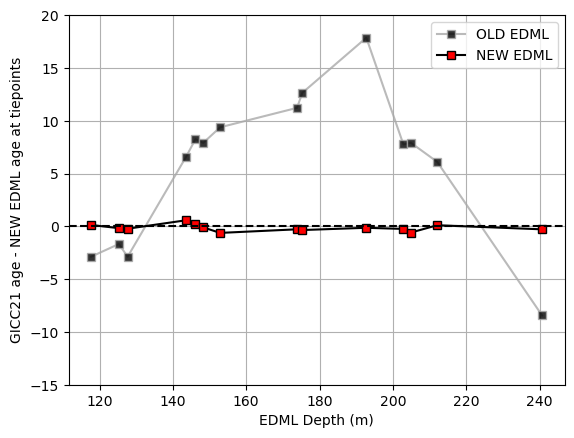

In [ ]:
#LC comparison check 1


plt.plot(ngrip_edml_ties['EDML m'], (ngrip_edml_ties['gicc21 age'] - ngrip_edml_ties['old_edml age']), marker='s', mfc='k', linestyle='-', color='darkgrey', alpha=0.8, label='OLD EDML')
plt.plot(ngrip_edml_ties['EDML m'], (ngrip_edml_ties['gicc21 age'] - ngrip_edml_ties['new_edml age']), marker='s', mfc='r', linestyle='-', color='k', label='NEW EDML')

# for i in range(int((ngrip_edml_ties['gicc21 age'].max() / 100)+1)):
#     u = i+1
#     max_error = u * 1

#     min_age = i * 100
#     max_age = (i + 1) * 100

#     min_depth = np.interp(min_age, EDML_reset_depth['age (b1950)'], EDML_reset_depth['Depth (m)'])
#     max_depth = np.interp(max_age, EDML_reset_depth['age (b1950)'], EDML_reset_depth['Depth (m)'])

#     plt.axvspan(min_depth, max_depth, ymin=((10/30) - (max_error/30)), ymax=((10/30) + (max_error/30)), alpha=0.3, color='gray')

plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21 age - NEW EDML age at tiepoints')
plt.xlabel('EDML Depth (m)')
plt.ylim(-15,20)
plt.grid()
plt.legend()

plt.savefig('/Users/quinnmackay/Documents/GitHub/BICC/Figures/Comparisons/GICC-EDML_new-old.png', dpi=300)

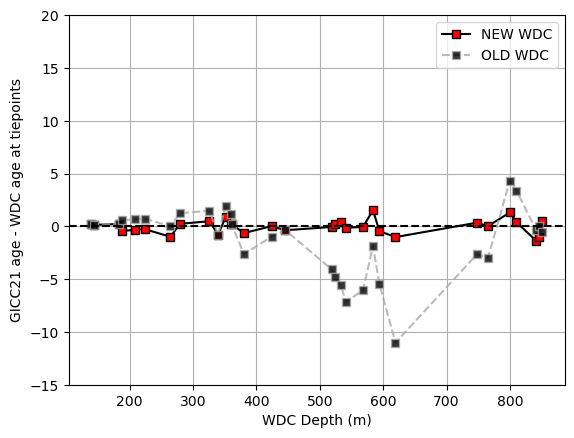

In [ ]:
plt.plot(grip_wdc_ties['WDC m'], (grip_wdc_ties['gicc21 age'] - grip_wdc_ties['new_wdc age']), marker='s', mfc='r', linestyle='-', color='k', label='NEW WDC')
plt.plot(grip_wdc_ties['WDC m'], (grip_wdc_ties['gicc21 age'] - grip_wdc_ties['old_wdc age']), marker='s', mfc='k', linestyle='--', color='darkgrey', alpha=0.8, label='OLD WDC')

# for i in range(int((grip_wdc_ties['gicc21 age'].max() / 100)+1)):
#     u = i+1
#     max_error = u * 1

#     min_age = i * 100
#     max_age = (i + 1) * 100

#     min_depth = np.interp(min_age, new_wdc_count['age'], new_wdc_count['depth'])
#     max_depth = np.interp(max_age, new_wdc_count['age'], new_wdc_count['depth'])

#     plt.axvspan(min_depth, max_depth, ymin=((15/20) - (max_error/20)), ymax=((15/20) + (max_error/20)), alpha=0.3, color='gray')


plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21 age - WDC age at tiepoints')
plt.xlabel('WDC Depth (m)')
plt.ylim(-15,20)
plt.grid()
plt.legend()

plt.savefig('/Users/quinnmackay/Documents/GitHub/BICC/Figures/Comparisons/GICC-WDC_new-old.png', dpi=300)